In [188]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
import h5py
from tqdm import tqdm
import scipy.io as sio
from scipy import stats
from importlib import reload
from matplotlib import pyplot as plt
import sys
sys.path.append('/home/jma819/post_cmfe_analysis')
#sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis')
import python_utils_jjm as utils_jjm
import dlc_utils
import caiman
from sklearn.preprocessing import MinMaxScaler
import scipy.spatial.distance as dist
import itertools
import math
import warnings
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import av
from multiprocessing import Pool
import functools
warnings.filterwarnings(action='once')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 12:31:43.505540. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [89]:
reload(utils_jjm)
reload(dlc_utils)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 11:12:14.540753. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


<module 'dlc_utils' from '/home/jma819/post_cmfe_analysis/dlc_utils.py'>

In [3]:
#cnmfe_file_key = pd.read_csv('/Volumes/My_Passport/dlc_analysis/behavcamvideos/open_field_miniscope/cnmfe_key.csv')
cnmfe_file_key = pd.read_csv('/projects/p30771/dlc_analysis/openfield_dlc_output/cnmfe_key.csv')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 10:17:11.570636. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [4]:
#cnmfe_base_dir = '/Volumes/My_Passport/cnmfe_analysis_files/batch_output_files/'
cnmfe_base_dir = '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/'
# '27-Feb_17_33_59_out.mat' '28-Feb_16_21_21_out.mat' '25-Mar_14_22_02_out.mat', '25-Mar_14_22_44_out.mat', '26-Mar_18_33_55_out.mat', '27-Mar_00_26_12_out.mat', '27-Mar_00_48_46_out.mat' throwing error
wt_CNMFE_files = ['29-Jan_12_35_06_out.mat','30-Mar_20_39_05_out.mat', '30-Mar_20_45_16_out.mat', '22-Mar_22_52_02_out.mat',
                 '28-Feb_16_10_05_out.mat', '27-Feb_17_32_15_out.mat', '25-Mar_13_27_27_out.mat',
                 '27-Feb_17_33_59_out.mat', '28-Feb_16_21_21_out.mat', '25-Mar_14_22_02_out.mat', '25-Mar_14_22_44_out.mat', 
                  '26-Mar_18_33_55_out.mat', '27-Mar_00_26_12_out.mat', '27-Mar_00_48_46_out.mat']

ko_CNMFE_files = ['30-Jan_16_54_31_out.mat','30-Jan_14_00_19_out.mat','31-Jan_01_43_49_out.mat','31-Jan_00_12_24_out.mat','31-Mar_13_28_15_out.mat', '29-Mar_21_42_20_out.mat', '13-Apr_17_57_40_out.mat', '29-Mar_14_27_55_out.mat', '13-Apr_16_01_20_out.mat',
                 '13-Apr_16_11_27_out.mat', '29-Mar_13_39_44_out.mat']

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 10:17:11.577963. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [5]:
#tracking_files = ['/Volumes/My_Passport/dlc_analysis/behavcamvideos/open_field_miniscope/'+utils_jjm.find_behavior_tracking(fname, cnmfe_file_key) for fname in wt_CNMFE_files] 
tracking_files = ['/projects/b1118/behaviorvideos/'+utils_jjm.find_behavior_tracking(fname, cnmfe_file_key, 'unsmoothed_02212021') for fname in wt_CNMFE_files] 

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 10:17:11.585153. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [6]:
CNMFE_dir_paths_list = [str(cnmfe_base_dir+fname) for fname in wt_CNMFE_files]
#CNMFE_dir_paths_list

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 10:17:11.590504. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [7]:
len(CNMFE_dir_paths_list)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 10:17:11.597422. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


14

In [8]:
len(tracking_files[:])

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 10:17:11.603356. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


14

In [9]:
grouped_raw_data = {}
success = []
failed = []
for CNMFE_file, tracking_file in zip(CNMFE_dir_paths_list, tracking_files):
    print(CNMFE_file)
    print(tracking_file)
    try:
        # load cell fluorescence 
        cell_fluorescence = sio.loadmat(CNMFE_file)
        C_timedelta = utils_jjm.create_fluorescence_time_delta(cell_fluorescence['C'])
        C_normalized = C_timedelta.apply(utils_jjm.normalize).set_index(pd.to_timedelta(np.linspace(0, (len(C_timedelta)-1)*(1/20), len(C_timedelta)), unit='s'), drop=True)
        C_z_scored = C_timedelta.apply(stats.zscore).set_index(pd.to_timedelta(np.linspace(0, (len(C_timedelta)-1)*(1/20), len(C_timedelta)), unit='s'), drop=True)
        C_normalized_z_scored = C_normalized.apply(stats.zscore).set_index(pd.to_timedelta(np.linspace(0, (len(C_normalized)-1)*(1/20), len(C_normalized)), unit='s'), drop=True)
        # create tracking time deltas
        #interpolated = utils_jjm.prepare_timedelta_dfs(tracking_file)
        velocity_data = pd.read_csv(tracking_file)
        velocity_data.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)
        velocity_data_td = velocity_data.set_index(pd.to_timedelta(np.linspace(velocity_data['sysClock'].iloc[0], 
               velocity_data['sysClock'].iloc[-1]/1000,
               len(velocity_data)), unit='s'), drop=True)
        #C_z_scored_filtered = utils_jjm.filter_out_by_size(C_z_scored, cell_contours, for_dims, 0.6, 100)
        #store results 
        #load spatial components by session
        com_df, spatial_components = utils_jjm.return_spatial_info(CNMFE_file, 0.6)
        cell_contours, for_dims = utils_jjm.create_contour_layouts(spatial_components)
        
        #store results 
        grouped_raw_data[tracking_file.split('/')[-2]] = {'C': C_timedelta, 'C_z_scored': C_z_scored, 'C_normalized': C_normalized, 'C_normalized_z_scored': C_normalized_z_scored, 
                                                          'velocity_data' : velocity_data_td, 'com' : com_df, 'spatial_components' : spatial_components, 'cell_contours': cell_contours,  
                                                         'for_dims' : for_dims}
        success.append((tracking_file.split('/')[-2], CNMFE_file.split('/')[-1]))
    except FileNotFoundError:
        failed.append(tracking_file)
    except OSError:
        failed.append(tracking_file)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 10:17:11.610054. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/29-Jan_12_35_06_out.mat
/projects/b1118/behaviorvideos/GRIN039_H12_M26_S54/GRIN039_H12_M26_S54_dlc_tracking_foranalysis_unsmoothed_02212021.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_39_05_out.mat
/projects/b1118/behaviorvideos/GRIN013_H13_M33_S54/GRIN013_H13_M33_S54_dlc_tracking_foranalysis_unsmoothed_02212021.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_45_16_out.mat
/projects/b1118/behaviorvideos/GRIN027_H13_M29_S44/GRIN027_H13_M29_S44_dlc_tracking_foranalysis_unsmoothed_02212021.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/22-Mar_22_52_02_out.mat
/projects/b1118/behaviorvideos/GRIN033_H14_M34_S32/GRIN033_H14_M34_S32_dlc_tracking_foranalysis_unsmoothed_02212021.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/28-Feb_16_10_05_out.mat
/projects/b1118/behaviorvideos/GRIN

## triggered averaging 

In [10]:
success

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 10:17:11.617382. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


[('GRIN039_H12_M26_S54', '29-Jan_12_35_06_out.mat'),
 ('GRIN013_H13_M33_S54', '30-Mar_20_39_05_out.mat'),
 ('GRIN027_H13_M29_S44', '30-Mar_20_45_16_out.mat'),
 ('GRIN033_H14_M34_S32', '22-Mar_22_52_02_out.mat'),
 ('GRIN033_H13_M42_S33', '28-Feb_16_10_05_out.mat'),
 ('GRIN032_H17_M30_S22', '27-Feb_17_32_15_out.mat'),
 ('GRIN034_H15_M28_S2', '25-Mar_13_27_27_out.mat'),
 ('GRIN026_H16_M35_S34', '27-Feb_17_33_59_out.mat'),
 ('GRIN032_H16_M49_S22', '28-Feb_16_21_21_out.mat'),
 ('GRIN034_H16_M13_S22', '25-Mar_14_22_02_out.mat'),
 ('GRIN034_H19_M0_S18', '25-Mar_14_22_44_out.mat'),
 ('GRIN035_H13_M50_S58', '26-Mar_18_33_55_out.mat'),
 ('GRIN035_H13_M31_S20', '27-Mar_00_26_12_out.mat'),
 ('GRIN035_H14_M40_S34', '27-Mar_00_48_46_out.mat')]

In [11]:
## combine dfs for each session to bin velocity values across dfs
#downsample
new_sampling_interval = .2
V_df = pd.concat([grouped_raw_data[session]['velocity_data'].resample(str(new_sampling_interval)+'S').max() 
                  for session in list(grouped_raw_data.keys())], keys=list(grouped_raw_data.keys()))
all_sessions_v_bins = pd.cut(V_df['tail_base'], bins=50)

V_df['velocity_bins'] = all_sessions_v_bins

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 10:17:11.623808. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [12]:
filtered_for_analysis = {}
for session in list(grouped_raw_data.keys()):
    # get indicies of small cells 
    cells_to_drop = np.array([int(cell) for cell in range(1, len(grouped_raw_data[session]['cell_contours'])+1) if 
                              len(np.array(np.where(grouped_raw_data[session]['for_dims'][cell]>0.6)[0]))<100])
    C_traces_filtered = grouped_raw_data[session]['C_normalized'].drop(cells_to_drop, axis=1)
    filtered_for_analysis[session] = C_traces_filtered.drop('msCamFrame', axis=1)

# sets sampling interval to 5Hz to correspond to behavior data 
C_norm_df = pd.concat([filtered_for_analysis[session].resample(str(new_sampling_interval)+'S').max()
                  for session in list(filtered_for_analysis.keys())], axis=1, keys=list(filtered_for_analysis.keys()))

# after downsampling convert back to regular index, timedelta is behaving oddly 
C_norm_df_reindexed = pd.concat([C_norm_df[session].reset_index(drop=True)
                  for session in list(set(C_norm_df.columns.get_level_values(0)))], axis=1, keys=list(set(C_norm_df.columns.get_level_values(0))))
# drop columns with all nan values
#C_norm_df_reindexed.dropna(axis=1, how='all', inplace=True)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 10:17:11.629320. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [13]:
list(set(C_norm_df.columns.get_level_values(0)))

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 10:17:11.634775. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


['GRIN033_H13_M42_S33',
 'GRIN033_H14_M34_S32',
 'GRIN034_H16_M13_S22',
 'GRIN032_H17_M30_S22',
 'GRIN013_H13_M33_S54',
 'GRIN035_H13_M31_S20',
 'GRIN026_H16_M35_S34',
 'GRIN034_H15_M28_S2',
 'GRIN034_H19_M0_S18',
 'GRIN027_H13_M29_S44',
 'GRIN039_H12_M26_S54',
 'GRIN035_H13_M50_S58',
 'GRIN032_H16_M49_S22',
 'GRIN035_H14_M40_S34']

In [14]:
# do same for velocity dataframe
V_df_reindexed = pd.concat([V_df.loc[session].reset_index()
                            for session in list(set(V_df.index.get_level_values(level=0)))], keys=list(set(V_df.index.get_level_values(level=0)))) 

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 10:17:11.639402. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [15]:
#bin by activity threshold, using original samples here
#inputs: (body_part, resting_time_threshold, active_time_threshold, crossing_threshold, resting_threshold, activity_threshold)
binned_velocity_df = pd.DataFrame([dlc_utils.bin_by_activity_threshold_2(grouped_raw_data[session]['velocity_data']['tail_base'], 10, 10, 2, 5, 1)
                                for session in list(grouped_raw_data.keys())], index=list(grouped_raw_data.keys()))
binned_velocity_df = binned_velocity_df.transpose()

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 10:17:11.644146. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
/home/jma819/post_cmfe_analysis/dlc_utils.py:193: RuntimeWarning: invalid value encountered in less
  if not(any(df_column.values[point+1:point+active_time_threshold] < activity_threshold)):


In [18]:
session = 'GRIN033_H13_M42_S33'

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 10:19:09.229396. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 11:43:16.204074. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


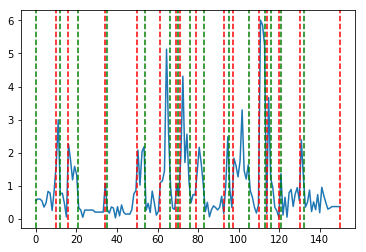

In [126]:
#pull out "resting periods"
velocity_trace = grouped_raw_data[session]['velocity_data']['tail_base'].values[10150:10300]
resting_samples = velocity_trace<=1
resting_boundaries = dlc_utils.get_resting_period_boundaries(resting_samples)

#plot resting periods
fig, ax = plt.subplots(1)
ax.plot(np.linspace(0, len(velocity_trace), len(velocity_trace)) , velocity_trace)
for bound in resting_boundaries:
    ax.axvline(x=bound[0], linestyle='--', color='g')
for bound in resting_boundaries:
    ax.axvline(x=bound[1], linestyle='--', color='r')
plt.show()


In [114]:
# get resting periods for all sessions
resting_boundaries_by_session = {}
for session in list(grouped_raw_data.keys()):
    resting_samples = grouped_raw_data[session]['velocity_data']['tail_base'].values<=
    resting_boundaries_by_session[session] = dlc_utils.get_resting_period_boundaries(resting_samples)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 11:35:09.480477. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less_equal
  after removing the cwd from sys.path.


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 11:28:25.621207. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


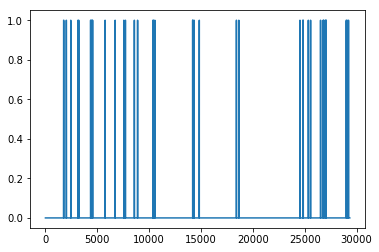

In [112]:
plt.plot(binned_velocity_df['GRIN033_H13_M42_S33'])

In [116]:
##get threshold crossing indicies from binned velocity df
crossing_indicies_from_velocity_df = {}
for session in list(grouped_raw_data.keys()):
    # gets indicies where animal crosses a velocity threshold
    # these indicies are from resampled df, need to find aligned section in resampled df 
    crossing_indicies = [sample for sample in utils_jjm.select_trigger_regions(binned_velocity_df[session], 0.5, 0.5, 20) if sample<len(grouped_raw_data[session]['C_normalized'])]
    # exclude regions with large nan contributions
    nan_values_to_exclude = [crossing_idx for crossing_idx in crossing_indicies if grouped_raw_data[session]['velocity_data'].iloc[crossing_idx:crossing_idx+10]['tail_base'].isna().sum()>1]        
    crossing_indicies_from_velocity_df[session] = [idx for idx in crossing_indicies if idx not in nan_values_to_exclude]

#get movement offset points
movement_offset_points_bysession = {session : dlc_utils.get_movement_offset_points(crossing_indicies_from_velocity_df[session], 1, grouped_raw_data[session]['velocity_data']['tail_base'])
                                                                        for session in crossing_indicies_from_velocity_df.keys()}

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 11:38:01.436561. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [117]:
session = 'GRIN033_H13_M42_S33'
#session_df = z_scored_regions_by_session[session]
sample_crossing_indicies = crossing_indicies_from_velocity_df[session]
print('session:', session)
print('threshold crossing indicies (from velocity data):' , sample_crossing_indicies)
print('cell indicies:' , list(set(C_norm_df[session].columns)))


session: GRIN033_H13_M42_S33
threshold crossing indicies (from velocity data): [1746, 3125, 3212, 4492, 5744, 7707, 8572, 8881, 10360, 10419, 14333, 14827, 18402, 24537, 24821, 25345, 25556, 26962, 27037]
cell indicies: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 11:38:11.328276. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [118]:
idx = 1
index = sample_crossing_indicies[idx]
print('sample crossing index: ', index)
frame_threshold_crossing = grouped_raw_data[session]['velocity_data'].iloc[index]['behavCam_frames']
behavCam_video = int(frame_threshold_crossing/1000)+1
frames_within_video =frame_threshold_crossing%1000
print('event occurs at ', frame_threshold_crossing, ' total frames')
print('behavCam ', behavCam_video, ' at ', frames_within_video, ' frames')

sample crossing index:  3125
event occurs at  4494.0  total frames
behavCam  5  at  494.0  frames


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 11:38:17.622837. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [20]:
#ani

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-24 14:39:50.886625. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [119]:
#now have bounds of movement region
#pull out these regions and bin by maybe 1 second to calcuate velocity 

moving_periods_by_session = {}
for session in crossing_indicies_from_velocity_df.keys():
    moving_indicies = [(start_idx, end_idx) for start_idx, end_idx in zip(crossing_indicies_from_velocity_df[session], movement_offset_points_bysession[session])]
    moving_periods_in_session = pd.DataFrame({k:v for k,v in zip([(start_idx, end_idx) for start_idx, end_idx in zip(crossing_indicies_from_velocity_df[session], movement_offset_points_bysession[session])], 
                                                             [grouped_raw_data[session]['velocity_data']['tail_base'].iloc[moving_indicies[period][0]:moving_indicies[period][1]].reset_index(drop=True)
                             for period in range(len(moving_indicies))])})
    moving_periods_by_session[session]=moving_periods_in_session

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 11:38:23.967204. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [127]:
#for each session, pull out the fluorescence during a movement event
session = 'GRIN033_H13_M42_S33'

movement_boundaries = list(moving_periods_by_session[session].columns)
pre_movement_boundaries = [(movement_bound[0]-80, movement_bound[0]) for movement_bound in movement_boundaries]
resting_boundaries = resting_boundaries_by_session[session]

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 11:43:26.780685. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [214]:
#for comparison, pull out the fluorescence during period preceeding movement event
def get_nearest_Cdf_td_tuples(bounds_tuple, index):
    movement_boundary_Cdf = (dlc_utils.nearest(index, bounds_tuple[0]), dlc_utils.nearest(index, bounds_tuple[1]))
    return(movement_boundary_Cdf)

def pull_out_fluorescence_from_velocity_bounds(velocity_trace_boundaries, velocity_trace, fluorescence_trace):
    """velocity trace and fluorescence trace are indexed by timedeltas
        e.g velocity_trace=grouped_raw_data[session]['velocity_data']
        fluorescence_trace=C_norm_df[session]
    """
    #convert indicies to timedelta and exclude those outside period of fluorescence recording
    movement_boundaries_time_delta = [(velocity_trace.iloc[movement_bounds[0]].name, velocity_trace.iloc[movement_bounds[1]].name) for movement_bounds in velocity_trace_boundaries if velocity_trace.iloc[movement_bounds[0]].name<C_norm_df[session].iloc[-1].name]
    #parallel this 
    p=Pool(7)
    movement_boundaries_Cdf = p.map(functools.partial(get_nearest_Cdf_td_tuples, fluorescence_trace.index), movement_boundaries_time_delta)
    p.close 
    fluorescence_during_movement = pd.concat([fluorescence_trace.loc[movement_bound_Cdf[0]:movement_bound_Cdf[1]] for movement_bound_Cdf in movement_boundaries_Cdf], axis=1, keys=movement_boundaries_Cdf)
    return(fluorescence_during_movement)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 13:03:25.347386. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [215]:
fluorescence_during_movement = pull_out_fluorescence_from_velocity_bounds(resting_boundaries[:-1], grouped_raw_data[session]['velocity_data'], C_norm_df[session])

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 13:03:26.346435. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [216]:
fluorescence_during_movement

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 13:03:40.349864. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


Empty DataFrame
Columns: [(0 days 00:00:00.102293, 0 days 00:00:00.102293, 1), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 2), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 3), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 4), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 5), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 6), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 7), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 8), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 9), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 10), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 11), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 12), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 13), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 14), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 15), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 16), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 17), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 18), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 19), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 20), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 21), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 22), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 23), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 25), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 26), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 27), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 28), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 29), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 30), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 31), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 32), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 33), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 34), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 35), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 36), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 37), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 38), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 39), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 40), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 43), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 45), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 46), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 47), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 48), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 49), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 50), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 51), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 52), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 53), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 54), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 55), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 56), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 57), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 58), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 60), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 61), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 62), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 63), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 64), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 65), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 67), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 68), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 69), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 70), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 71), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 72), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 73), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 75), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 78), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 79), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 80), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 81), (0 days 00:00:00.102293, 0 days 00:00:00.102293, 82), (0 days 00:00:00.102293, 0 days 00:00:00.

In [132]:
movement_fluorescence = pull_out_fluorescence_from_velocity_bounds(movement_boundaries, grouped_raw_data[session]['velocity_data'], C_norm_df[session])
pre_movement_fluorescence = pull_out_fluorescence_from_velocity_bounds(pre_movement_boundaries, grouped_raw_data[session]['velocity_data'], C_norm_df[session])
resting_fluorescence = pull_out_fluorescence_from_velocity_bounds(resting_boundaries[:-1], grouped_raw_data[session]['velocity_data'], C_norm_df[session])

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-25 11:44:39.505324. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


IndexError: single positional indexer is out-of-bounds

In [ ]:
#need to find "event rate"

In [122]:
onset_times = list(pre_movement_fluorescence.columns.levels[0])
offset_times = list(pre_movement_fluorescence.columns.levels[1])

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-24 15:54:30.195391. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-24 16:23:00.225171. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


0.06731947706428554
0.3185784894787836


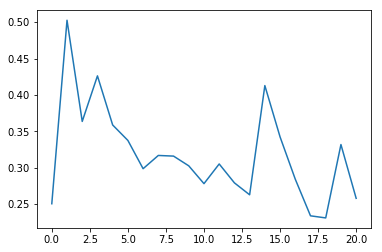

In [157]:
pre_movement_offset_onset=[(onset, offset) for onset, offset in zip(list(pre_movement_fluorescence.columns.levels[0]), 
                                                                    list(pre_movement_fluorescence.columns.levels[1]))]
post_movement_offset_onset=[(onset, offset) for onset, offset in zip(list(movement_fluorescence.columns.levels[0]), 
                                                                    list(movement_fluorescence.columns.levels[1]))]
cell=4
event=0

#for each cell use the premovement regions to get the standard deviation for z scoring 
#
pre_movement_stddev=pre_movement_fluorescence.reset_index(drop=True)[pre_movement_offset_onset[event][0]][pre_movement_offset_onset[event][1]][cell].std()
pre_movement_mean=pre_movement_fluorescence.reset_index(drop=True)[pre_movement_offset_onset[event][0]][pre_movement_offset_onset[event][1]][cell].mean()
plt.plot(pre_movement_fluorescence.reset_index(drop=True)[pre_movement_offset_onset[event][0]][pre_movement_offset_onset[event][1]][cell])
print(stddev)
print(mean)

In [158]:
z_scored_region = (movement_fluorescence.reset_index(drop=True)[post_movement_offset_onset[event][0]][post_movement_offset_onset[event][1]][cell] - mean)/stddev

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-24 16:23:46.337504. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-24 16:23:47.127279. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


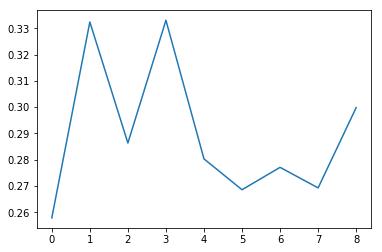

In [159]:
plt.plot(movement_fluorescence.reset_index(drop=True)[post_movement_offset_onset[event][0]][post_movement_offset_onset[event][1]][cell])

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-24 16:23:54.424896. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


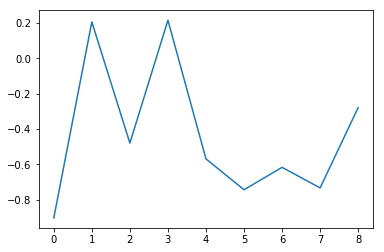

In [160]:
plt.plot(z_scored_region)

(array([1, 3]),)


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-24 16:40:42.516360. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


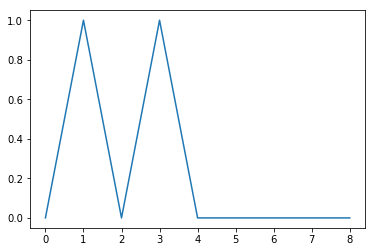

In [172]:
#for calculating "event rate"
event_trace = utils_jjm.binning_function_uncrop_array(z_scored_region.dropna(), 1, 0) 
#get threshold crossings 
print(np.where(event_trace>0.5))
plt.plot(event_trace)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-24 12:05:01.490820. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


Frame: 0/1000 ...


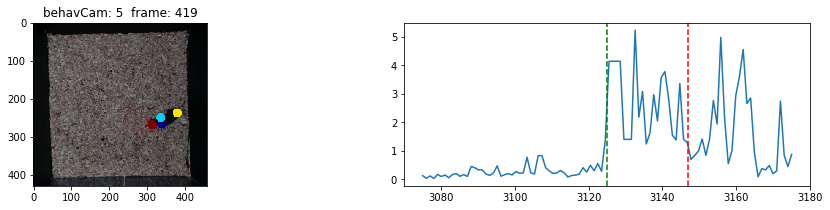

In [152]:
# load behavior video 
sample_range_in_behavCam_video = (int(grouped_raw_data[session]['velocity_data'].iloc[index-50]['behavCam_frames']%1000),
                                  int(grouped_raw_data[session]['velocity_data'].iloc[index+50]['behavCam_frames']%1000))
video = av.open('/projects/b1118/behaviorvideos/'+session+'/behavCam'+str(behavCam_video)+'DLC_resnet50_Open_Field_v2Jan27shuffle1_150000_labeled.mp4')
total_frames = video.streams.video[0].frames
movie_images = {}
for i, frame in enumerate(video.decode(video=0)):
    img = frame.to_image()  # PIL image
    movie_images[i] = img
    if i%1000==0:
        print("Frame: %d/%d ..." % (i, total_frames))
video.close()
movie_shape = np.shape(movie_images[1])

frame_subset = [movie_images[i] for i in range(sample_range_in_behavCam_video[0], sample_range_in_behavCam_video[1])]

fig, (ax1, ax2) = plt.subplots(1, 2)
im = ax1.imshow(frame_subset[0])
ax2.plot(np.linspace(index-50, index+50, 100), grouped_raw_data[session]['velocity_data']['tail_base'].iloc[index-50:index+50])
ax2.axvline(x=(index), linestyle='--', color='g')
ax2.axvline(x=movement_offset_points_bysession[session][idx], linestyle='--', color='r')
fig.set_size_inches(16, 3)
#ax2.secondary_xaxis(-.2, functions=(lambda x: grouped_raw_data[session]['velocity_data'].iloc[x]['behavCam_frames'], 
#                                    lambda x: grouped_raw_data[session]['velocity_data'].iloc[x]['behavCam_frames']))
#ani = animation.ArtistAnimation(fig, matplotlib_images, interval=50, blit=True, repeat_delay=1000)
#HTML(ani.to_html5_video())
def init():
    ax1.set_title("behavCam: "+str(behavCam_video)+"  frame: "+str(sample_range_in_behavCam_video[0]))
    im.set_data(frame_subset[0])
def animate(i):
    ax1.set_title("behavCam: "+str(behavCam_video)+"  frame: "+str(sample_range_in_behavCam_video[0]+i))
    im.set_data(frame_subset[i])
    #ax2.axvline(x=(index-(50+i)), linestyle='--', color='r')
    return im

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(frame_subset), interval=50)
rc('animation', html='jshtml')
#HTML(ani.to_html5_video())

In [146]:
#plot 2d change in coordinates, dimensions are d1(y) = 430, d2(x) = 458
#coordinates_df = pd.read_csv('/projects/b1118/behaviorvideos/'+session+'/'+session+'_coordinates_compiled_02212021.csv', 
#                             header= [0, 1, 2]).drop(['Unnamed: 1_level_0'], axis=1)

#plt.plot(coordinates_df['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000']['tail_base']['x'].iloc[index-50:index+50])

#plt.plot(coordinates_df['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000']['tail_base']['y'].iloc[index-50:index+50])

#plt.plot(coordinates_df['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000']['tail_base'].iloc[index:index+50]['x'],
#                        coordinates_df['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000']['tail_base'].iloc[index:index+50]['y'])
#plt.ylim((430, 0))
#plt.xlim((0, 458))

#coordinates_df['DLC_resnet50_Open_Field_v2Jan27shuffle1_150000']['tail_base'].iloc[index-50:index+50]['x']

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-23 14:16:28.572213. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [132]:
##pull out and z-score regions in fluorescence trace
regions_by_session = {}
to_concat = []
for session in list(grouped_raw_data.keys()):
    crossing_indicies = 
    if len(crossing_indicies)>0:
        print(session)
        movement_regions_in_recording = {}
        # only include samples that are within range of miniscope data
        for sample in crossing_indicies:
            #crossing indicies are from the velocity df with original sampling interval, find closest index in the resampled C_df by comparing timedeltas 
            nearest_resampled = dlc_utils.nearest(list(C_norm_df[session].index), grouped_raw_data[session]['velocity_data'].iloc[sample].name)
            integer_idx = np.where(C_norm_df[session].index == nearest_resampled)[0][0]  
                
            #use "resampled df" 
            raw_data_to_baseline = C_norm_df_reindexed[session]

            # so say baseline is 80 samples to 20 samples before threshold
            baseline_region = raw_data_to_baseline[integer_idx-50:integer_idx-20].reset_index(drop=True)
            movement_region = raw_data_to_baseline[integer_idx-50:integer_idx+50].reset_index(drop=True)

            baseline_region_std_dev = baseline_region.std(axis=0)
            baseline_region_mean = baseline_region.mean(axis=0)

            movement_region_z_scored = pd.DataFrame((movement_region-baseline_region_mean.values)/baseline_region_std_dev)
    
            movement_regions_in_recording[integer_idx] = movement_region_z_scored
        regions_by_session[session] = pd.concat(movement_regions_in_recording, axis=1, keys=list(movement_regions_in_recording.keys()))
        to_concat.append(session)
    
z_scored_regions_by_session = pd.concat(list(regions_by_session.values()), axis=1, keys=to_concat)
sample_crossing_indicies_Cdf = np.array([sample_idx for sample_idx in session_df.columns.levels[0] if sample_idx in session_df.columns])
print('threshold crossing indicies in fluorescence trace: ', sample_crossing_indicies_Cdf)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-22 18:29:50.050099. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


GRIN039_H12_M26_S54
GRIN013_H13_M33_S54
GRIN027_H13_M29_S44
GRIN033_H14_M34_S32
GRIN033_H13_M42_S33
GRIN032_H17_M30_S22
GRIN034_H15_M28_S2
GRIN026_H16_M35_S34
GRIN032_H16_M49_S22
GRIN034_H16_M13_S22
GRIN035_H13_M31_S20
GRIN035_H14_M40_S34


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-22 18:43:53.899582. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


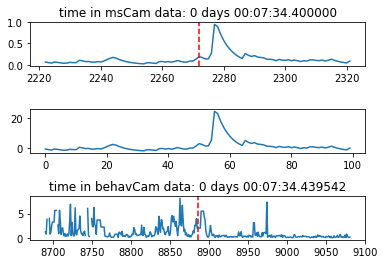

(Timedelta('0 days 00:07:24.400000'), Timedelta('0 days 00:07:44.200000'))
(Timedelta('0 days 00:07:24.465911'), Timedelta('0 days 00:07:44.362026'))
RMS noise: 4.513891574098059
Peak: 24.133059399445752
Peak/RMS: 5.3463976711199335


In [160]:
##plot individual cell activity
#raw "pre z score" region
#velocity
index = sample_crossing_indicies[idx]
#zscores
c_idx = sample_crossing_indicies_Cdf[idx]
#adjust x scales for difference in sampling interval 
sample_range_c_df = 50
sample_range_v_df = int(50/(sampling_interval_vdf/sampling_interval_cdf))

cell = 51
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.set_title('time in msCam data: '+str(C_norm_df[session].iloc[sample_crossing_indicies_Cdf[idx]].name))
ax1.plot(C_norm_df_reindexed[session][cell][c_idx-sample_range_c_df:c_idx+sample_range_c_df]) 
ax1.axvline(x=(c_idx), linestyle='--', color='r')
ax2.plot(z_scored_regions_by_session[session][c_idx][cell])
ax3.set_title('time in behavCam data: '+str(grouped_raw_data[session]['velocity_data'].iloc[sample_crossing_indicies[idx]].name))
ax3.plot(np.linspace(index-sample_range_v_df, index+sample_range_v_df, sample_range_v_df*2), 
         grouped_raw_data[session]['velocity_data']['tail_base'].iloc[index-sample_range_v_df:index+sample_range_v_df]) 
ax3.axvline(x=(index), linestyle='--', color='r')
#ax2.plot(np.linspace(index-50, index+50, 100), grouped_raw_data[session]['velocity_data']['tail_base'].iloc[index-50:index+50])
plt.subplots_adjust(hspace=1)
plt.show()
#limits of plot from timedelta index in c_df and v_df 
print((C_norm_df[session][cell].iloc[c_idx-sample_range_c_df:c_idx+sample_range_c_df].index[0], 
       C_norm_df[session][cell].iloc[c_idx-sample_range_c_df:c_idx+sample_range_c_df].index[-1]))
print((grouped_raw_data[session]['velocity_data'].iloc[index-sample_range_v_df:index+sample_range_v_df].index[0], 
       grouped_raw_data[session]['velocity_data'].iloc[index-sample_range_v_df:index+sample_range_v_df].index[-1]))
#display rms noise for trace 
rms = np.sqrt(np.mean(np.square(z_scored_regions_by_session[session][c_idx][cell])))
peak = np.max(z_scored_regions_by_session[session][c_idx][cell])
print('RMS noise:', rms)
print('Peak:', peak)
print('Peak/RMS:', peak/rms)

In [28]:
## plot cell contour 
# "spatial components", or "A" as dense matrix 
cell_contour = grouped_raw_data[session]['spatial_components'][:, cell]
# create movie
frame_range = [0, len(z_scored_regions_by_session[session][c_idx][cell])]

d1 = 752
d2 = 480
A_cell_reshaped = np.reshape(cell_contour, (d2, d1))
C_cell_trace = z_scored_regions_by_session[session][c_idx][cell]
response_movie = np.array([np.dot(A_cell_reshaped, C_cell_trace[frame]) for frame in range(frame_range[0], frame_range[1])])

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-22 15:22:52.071688. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [29]:
np.shape(response_movie)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-22 15:22:52.076950. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


(160, 480, 752)

In [30]:
## plot responses of all cells during movement events
all_cell_contours = grouped_raw_data[session]['spatial_components'][:, :]

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-22 15:22:52.081296. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [45]:
#list(set(z_scored_regions_by_session[session].columns.get_level_values(1)))
def create_demixed_movie_from_traces(cells, cell_contours, )

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-22 15:36:08.278591. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [46]:
cells_reshaped = np.empty((np.shape(all_cell_contours)[1], frame_range[1], d2, d1))
for cell in tqdm(list(set(z_scored_regions_by_session[session].columns.get_level_values(1)))):
    print(cell)
    A_reshaped = np.reshape(all_cell_contours[:, cell-1], (d2, d1))
    #cell_frames = []
    #for frame in range(frame_range[0], frame_range[1]):
        #cell_frames.append(np.array([np.dot(A_reshaped, item) for item in [255, 128, 0, z_scored_regions_by_session[session][sample][cell][frame]]]))
    cells_reshaped[cell-1] = np.array([np.dot(A_reshaped, z_scored_regions_by_session[session][c_idx][cell][frame]) for frame in range(frame_range[0], frame_range[1])])

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-22 15:36:42.290757. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)

  0%|          | 0/104 [00:00<?, ?it/s]

1



  1%|          | 1/104 [00:00<01:08,  1.51it/s]

2



  2%|▏         | 2/104 [00:01<01:07,  1.52it/s]

3



  3%|▎         | 3/104 [00:01<01:06,  1.52it/s]

4



  4%|▍         | 4/104 [00:02<01:05,  1.52it/s]

5



  5%|▍         | 5/104 [00:03<01:05,  1.52it/s]

6



  6%|▌         | 6/104 [00:03<01:04,  1.52it/s]

7



  7%|▋         | 7/104 [00:04<01:03,  1.52it/s]

11



  8%|▊         | 8/104 [00:05<01:03,  1.52it/s]

14



  9%|▊         | 9/104 [00:05<01:02,  1.52it/s]

15



 10%|▉         | 10/104 [00:06<01:01,  1.52it/s]

17



 11%|█         | 11/104 [00:07<01:01,  1.52it/s]

18



 12%|█▏        | 12/104 [00:07<01:00,  1.52it/s]

19



 12%|█▎        | 13/104 [00:08<00:59,  1.52it/s]

21



 13%|█▎        | 14/104 [00:09<00:59,  1.52it/s]

22



 14%|█▍        | 15/104 [00:09<00:58,  1.52it/s]

23



 15%|█▌        | 16/104 [00:10<00:57,  1.52it/s]

25



 16%|█▋        | 17/104 [00:11<00:57,  1.51it/s]

27



 17%|█▋        | 18/104 [00:11<00:57,  1.49it/s]

28



 18%|█▊        | 19/104 [00:12<00:57,  1.47it/s]

29



 19%|█▉        | 20/104 [00:13<00:57,  1.46it/s]

30



 20%|██        | 21/104 [00:13<00:57,  1.45it/s]

31



 21%|██        | 22/104 [00:14<00:56,  1.45it/s]

32



 22%|██▏       | 23/104 [00:15<00:55,  1.46it/s]

33



 23%|██▎       | 24/104 [00:16<00:54,  1.46it/s]

34



 24%|██▍       | 25/104 [00:16<00:54,  1.46it/s]

35



 25%|██▌       | 26/104 [00:17<00:53,  1.46it/s]

36



 26%|██▌       | 27/104 [00:18<00:52,  1.47it/s]

37



 27%|██▋       | 28/104 [00:18<00:51,  1.47it/s]

38



 28%|██▊       | 29/104 [00:19<00:51,  1.47it/s]

39



 29%|██▉       | 30/104 [00:20<00:50,  1.47it/s]

40



 30%|██▉       | 31/104 [00:20<00:49,  1.47it/s]

41



 31%|███       | 32/104 [00:21<00:48,  1.47it/s]

42



 32%|███▏      | 33/104 [00:22<00:48,  1.47it/s]

43



 33%|███▎      | 34/104 [00:22<00:47,  1.47it/s]

44



 34%|███▎      | 35/104 [00:23<00:46,  1.47it/s]

45



 35%|███▍      | 36/104 [00:24<00:46,  1.47it/s]

46



 36%|███▌      | 37/104 [00:24<00:45,  1.47it/s]

47



 37%|███▋      | 38/104 [00:25<00:44,  1.47it/s]

48



 38%|███▊      | 39/104 [00:26<00:44,  1.47it/s]

49



 38%|███▊      | 40/104 [00:26<00:43,  1.47it/s]

50



 39%|███▉      | 41/104 [00:27<00:42,  1.47it/s]

51



 40%|████      | 42/104 [00:28<00:42,  1.47it/s]

52



 41%|████▏     | 43/104 [00:28<00:41,  1.47it/s]

53



 42%|████▏     | 44/104 [00:29<00:40,  1.47it/s]

54



 43%|████▎     | 45/104 [00:30<00:40,  1.47it/s]

55



 44%|████▍     | 46/104 [00:31<00:39,  1.46it/s]

56



 45%|████▌     | 47/104 [00:31<00:38,  1.47it/s]

57



 46%|████▌     | 48/104 [00:32<00:38,  1.47it/s]

58



 47%|████▋     | 49/104 [00:33<00:37,  1.47it/s]

59



 48%|████▊     | 50/104 [00:33<00:36,  1.47it/s]

60



 49%|████▉     | 51/104 [00:34<00:36,  1.46it/s]

61



 50%|█████     | 52/104 [00:35<00:35,  1.46it/s]

62



 51%|█████     | 53/104 [00:35<00:35,  1.45it/s]

63



 52%|█████▏    | 54/104 [00:36<00:34,  1.46it/s]

65



 53%|█████▎    | 55/104 [00:37<00:33,  1.46it/s]

66



 54%|█████▍    | 56/104 [00:37<00:32,  1.46it/s]

67



 55%|█████▍    | 57/104 [00:38<00:32,  1.46it/s]

68



 56%|█████▌    | 58/104 [00:39<00:31,  1.46it/s]

69



 57%|█████▋    | 59/104 [00:39<00:30,  1.46it/s]

71



 58%|█████▊    | 60/104 [00:40<00:30,  1.46it/s]

73



 59%|█████▊    | 61/104 [00:41<00:29,  1.47it/s]

74



 60%|█████▉    | 62/104 [00:41<00:28,  1.47it/s]

75



 61%|██████    | 63/104 [00:42<00:27,  1.47it/s]

79



 62%|██████▏   | 64/104 [00:43<00:27,  1.47it/s]

83



 62%|██████▎   | 65/104 [00:43<00:26,  1.47it/s]

86



 63%|██████▎   | 66/104 [00:44<00:25,  1.47it/s]

88



 64%|██████▍   | 67/104 [00:45<00:25,  1.47it/s]

89



 65%|██████▌   | 68/104 [00:46<00:24,  1.47it/s]

90



 66%|██████▋   | 69/104 [00:46<00:23,  1.47it/s]

91



 67%|██████▋   | 70/104 [00:47<00:23,  1.47it/s]

92



 68%|██████▊   | 71/104 [00:48<00:22,  1.47it/s]

93



 69%|██████▉   | 72/104 [00:48<00:21,  1.47it/s]

94



 70%|███████   | 73/104 [00:49<00:21,  1.46it/s]

95



 71%|███████   | 74/104 [00:50<00:21,  1.41it/s]

96



 72%|███████▏  | 75/104 [00:51<00:21,  1.34it/s]

97



 73%|███████▎  | 76/104 [00:51<00:22,  1.26it/s]

98



 74%|███████▍  | 77/104 [00:52<00:22,  1.20it/s]

99



 75%|███████▌  | 78/104 [00:53<00:22,  1.13it/s]

100



 76%|███████▌  | 79/104 [00:54<00:23,  1.08it/s]

101



 77%|███████▋  | 80/104 [00:55<00:22,  1.05it/s]

104



 78%|███████▊  | 81/104 [00:56<00:22,  1.03it/s]

107



 79%|███████▉  | 82/104 [00:57<00:21,  1.02it/s]

110



 80%|███████▉  | 83/104 [00:58<00:20,  1.01it/s]

114



 81%|████████  | 84/104 [00:59<00:19,  1.00it/s]

118



 82%|████████▏ | 85/104 [01:00<00:18,  1.00it/s]

121



 83%|████████▎ | 86/104 [01:01<00:18,  1.00s/it]

127



 84%|████████▎ | 87/104 [01:02<00:17,  1.00s/it]

129



 85%|████████▍ | 88/104 [01:03<00:16,  1.00s/it]

131



 86%|████████▌ | 89/104 [01:04<00:15,  1.01s/it]

132



 87%|████████▋ | 90/104 [01:05<00:14,  1.01s/it]

133



 88%|████████▊ | 91/104 [01:06<00:13,  1.01s/it]

134



 88%|████████▊ | 92/104 [01:07<00:12,  1.01s/it]

135



 89%|████████▉ | 93/104 [01:08<00:11,  1.00s/it]

139



 90%|█████████ | 94/104 [01:09<00:10,  1.00s/it]

140



 91%|█████████▏| 95/104 [01:10<00:09,  1.00s/it]

143



 92%|█████████▏| 96/104 [01:11<00:08,  1.00s/it]

145



 93%|█████████▎| 97/104 [01:12<00:07,  1.00s/it]

146



 94%|█████████▍| 98/104 [01:13<00:06,  1.00s/it]

147



 95%|█████████▌| 99/104 [01:14<00:05,  1.00s/it]

150



 96%|█████████▌| 100/104 [01:15<00:04,  1.00s/it]

152



 97%|█████████▋| 101/104 [01:16<00:03,  1.00s/it]

154



 98%|█████████▊| 102/104 [01:18<00:02,  1.00s/it]

155



 99%|█████████▉| 103/104 [01:19<00:01,  1.00s/it]

156



100%|██████████| 104/104 [01:20<00:00,  1.01s/it]


In [47]:
cells_recombined = np.sum(cells_reshaped, axis=0)
response_movie = np.sum(response_movie, axis=0)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-22 15:38:24.411521. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [48]:
## plot individual cell activity 
# np array with shape (frames, height, width, channels)
video = cells_recombined

fig = plt.figure()
im = plt.imshow(video[0,:,:], cmap='gray', vmin=0, vmax=255)

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0,:,:])

def animate(i):
    im.set_data(video[i,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)

## need ffmpeg on quest
HTML(anim.to_html5_video())

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-22 15:38:48.568333. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


RuntimeError: Requested MovieWriter (ffmpeg) not available

In [ ]:
## plot individual cell activity 
# np array with shape (frames, height, width, channels)
video = cells_recombined
video_2 = response_movie

fig = plt.figure()
p1 = fig.add_subplot(1,2,1)
im = p1.imshow(video[0,:,:], cmap='gray', vmin=0, vmax=255)
p2 = fig.add_subplot(1,2,2)
im2 = p2.imshow(video_2[0,:,:], cmap='gray', vmin=0, vmax=255)

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0,:,:])
    im2.set_data(video_2[0,:,:])

def animate(i):
    im.set_data(video[i,:,:])
    im2.set_data(video_2[i,:,:])
    return (im, im2)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)

## need ffmpeg on quest
HTML(anim.to_html5_video())

In [ ]:
## how to compare with raw traces? maybe use sample indicies to determine specific avi files, then pull from those (w/direct mount to resfiles?), or automate a globus script? 

In [ ]:
# pause to take input (y/n) to determine if trace is ideal 

In [ ]:
# calculate the peak to rms ratio for each threshold event, each cell, and across all cells and events 

peak_rms = lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence)))

cell = 2
event = 1097

peak_rms_ratio_cell = z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==cell].apply(lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence))), axis=0)
peak_rms_ratio_event = z_scored_regions_by_session['GRIN039_H12_M26_S54'][event].apply(lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence))), axis=0)
peak_rms_ratio = z_scored_regions_by_session['GRIN039_H12_M26_S54'].apply(lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence))), axis=0)

In [ ]:
#histogram of all peak to rms ratios across sample events
plt.hist(peak_rms_ratio, 100)
plt.show()

In [ ]:
z_scored_regions_by_session.max()

In [ ]:
peak_rms_ratio.max()

In [ ]:
# plot average activity of a cell across all movement events 

In [ ]:
# plots the activity of a cell across all movement threshold crossings in a given session
cell = 1
z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==cell].head()

In [ ]:
# plot a few example traces
events_to_plot = [0, 1, 5]
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4)
ax1.plot(z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[0]]])
ax2.plot(z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[1]]])
ax3.plot(z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[2]]])
ax4.plot(pd.concat([z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[0]]],
                   z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[1]]],
                  z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[2]]]], axis=1).mean(axis=1))

In [ ]:
#concat by mouse 
concacted_by_mouse = {}
for mouse in [name[0:7] for name in list(set(z_scored_regions_by_session.columns.levels[0]))]:
    dfs_by_mouse = []
    sessions = []
    for session in list(z_scored_regions_by_session.columns.levels[0]):
        if mouse in session:
            if not(z_scored_regions_by_session[session].empty):
                #means = z_scored_regions_by_session[session].mean(axis=1, level=0)
                dfs_by_mouse.append(z_scored_regions_by_session[session])
                sessions.append(session)
    if len(dfs_by_mouse)>0:
        concacted_by_mouse[mouse] = pd.concat(dfs_by_mouse, axis=1, keys=sessions)
combined_by_mouse = pd.concat(list(concacted_by_mouse.values()), axis=1, keys=list(concacted_by_mouse.keys()))

In [ ]:
# maybe should do min, max scaler here
plt.plot(combined_by_mouse.mean(axis=1))

In [ ]:
# create range scaled data to compare across cells
scaler = MinMaxScaler()
activity_scaled = pd.DataFrame(scaler.fit_transform(combined_by_mouse), columns=combined_by_mouse.columns)
activity_scaled_cell_means = activity_scaled.groupby(level=[0,1], axis=1).mean()

In [ ]:
plt.plot(activity_scaled.mean(axis=1))

In [ ]:
combined_by_mouse_timedelta = combined_by_mouse.set_index(pd.to_timedelta(np.linspace(0, (len(combined_by_mouse)-1)*(1/5), len(combined_by_mouse)), unit='s'), drop=True)

In [ ]:
#resampled_for_plotting.head()

In [ ]:
plt.rcParams.update({'font.size': 22})
df_to_plot = resampled_for_plotting
activity_measure = 'spatial_coordination'
x = np.linspace(-(len(df_to_plot)/2)*.5, (len(df_to_plot)/2)*.5, len(df_to_plot))
scale_f = 0.0868
mean=df_to_plot.mean(axis=1, level=2)['velocity'].values*scale_f
plt.plot(x, df_to_plot.mean(axis=1, level=2)['velocity'].values*scale_f, color='k')
std_error = ((df_to_plot.std(axis=1, level=2)['velocity'])/math.sqrt(df_to_plot.mean(axis=1, level=0).shape[1]))*scale_f
plt.fill_between(x, mean-std_error, mean+std_error)
ax = plt.gca()
ax.set_ylabel('velocity cm/sec')
ax.set_xlabel('time (seconds)')
ax.axvline(x=(0), linestyle='--', color='r')
fig = plt.gcf()
fig.set_size_inches(7, 6)
#fig.draw()
#fig.savefig('/home/jma819/presentation_files/wt_velocity_spatial_coord_triggered.svg', transparent=True)
fig.subplots_adjust(left=0.15)
fig.savefig('/Users/johnmarshall/Documents/Presentations/Feb20201_LabMeeting/v_triggered.pdf', transparent=True)
plt.show()

In [ ]:
activity_measure = 'fluorescence'
x = np.linspace(-(len(df_to_plot)/2)*.5, (len(df_to_plot)/2)*.5, len(df_to_plot))
mean = df_to_plot.mean(axis=1, level=2)[activity_measure].values
plt.plot(x, mean, color='k')
std_error = (df_to_plot.std(axis=1, level=2)[activity_measure])/math.sqrt(df_to_plot.mean(axis=1, level=0).shape[1]*1)
plt.fill_between(x, mean-std_error, mean+std_error)
ax = plt.gca()
ax.set_ylabel('dF/F z-score')
ax.set_xlabel('time (seconds)')
ax.axvline(x=0, linestyle='--', color='r')
fig = plt.gcf()
fig.set_size_inches(7, 6)
#fig.draw()
#fig.savefig('.svg')
fig.subplots_adjust(left=0.15)
fig.savefig('/Users/johnmarshall/Documents/Presentations/Feb20201_LabMeeting/wt_fluorescence_triggered.pdf', transparent=True)
plt.show()

## event ISIs 

In [ ]:
filtered_for_analysis = {}
for session in list(grouped_raw_data.keys()):
    filtered_for_analysis[session] = utils_jjm.filter_out_by_size(grouped_raw_data[session]['C_normalized_z_scored'], grouped_raw_data[session]['cell_contours'], 
                                                                  grouped_raw_data[session]['for_dims'], 0.6, 100)
C_df = pd.concat([filtered_for_analysis[session].resample(str(new_sampling_interval)+'S').max()
                  for session in list(grouped_raw_data.keys())], keys=list(grouped_raw_data.keys()))

In [ ]:
C_df = C_df.drop(['msCamFrame'], axis=1)

In [ ]:
ISIs_by_session = []
for session in list(grouped_raw_data.keys()):
    print(session)
    event_indicies, event_times, event_ISIs = utils_jjm.get_ISIs(C_df.loc[session].dropna(axis=1), 20, .1, np.array(C_df.loc[session].dropna(axis=1).columns), 2)
    ISIs_by_session.append(event_ISIs)